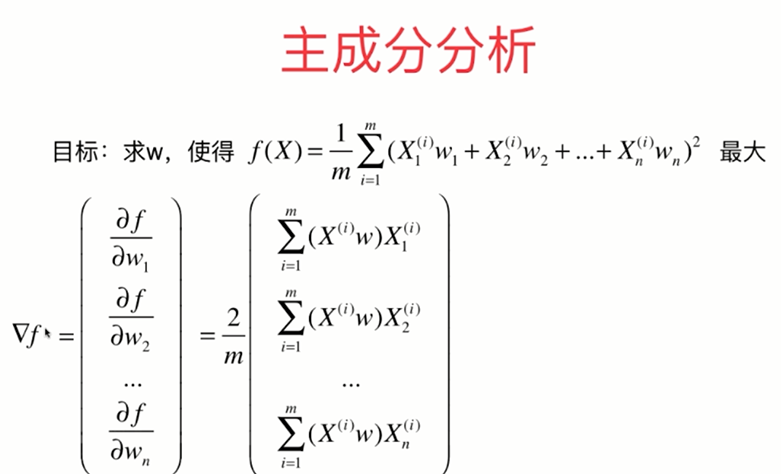

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.empty((100,2))
x[:,0]  = np.random.uniform(0. , 100. , size=100)
x[:,1]  = 0.75 * x[:,0] + 3. + np.random.normal(0 , 10. , size=100)

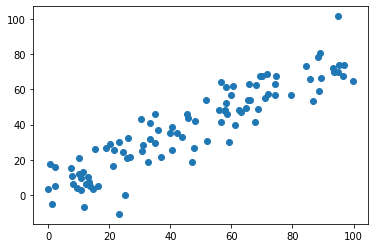

In [3]:
plt.scatter(x[:,0] , x[:,1])
plt.show()

### 均值归一  demean

In [4]:
def demean(x):
    return x - np.mean(x , axis=0)

In [5]:
x = demean(x)

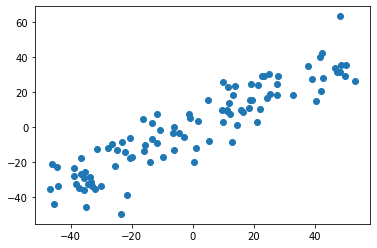

In [6]:
plt.scatter(x[:,0] , x[:,1])
plt.show()

### 梯度上升

#### 效用函数

In [7]:
def F(w , x):
    return sum((x.dot(w))**2) / len(x)

#### 求导函数

In [8]:
def dF(w , x):
    return x.T.dot(x.dot(w)) * 2. / len(x)

#### w向量单位化

In [9]:
def basis(w):
    return w / np.linalg.norm(w)

#### 梯度上升函数

In [10]:
def gradient_ascent(init_w , x , eta , esplion = 1e-8 , n_iters = 1e4):
    c_iter = 0
    w = basis(init_w)
    while c_iter < n_iters:
        gradient = dF(w , x)
        w_last = w
        w +=  eta * gradient
        w = basis(w)
        if (abs( F(w , x) - F(w_last , x) ) < esplion) :
            break
        c_iter += 1    
        
    return w

In [11]:
init_w = np.random.random(x.shape[1]) #初始化不能为0
init_w

array([0.9913756 , 0.35582181])

In [12]:
eta=0.001
w = gradient_ascent(init_w,x,eta)
w

array([0.77213663, 0.63545655])

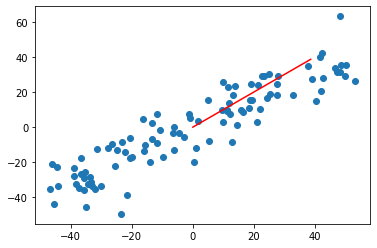

In [13]:
plt.scatter(x[:,0],x[:,1])
plt.plot( [0 , w[0]*50] , [0 , w[0]*50] , color='r' )

### 求前n个主成分 

思路：

求出第一主成分后，在原来的向量上减去第一主成分，再将减后的向量求第一主成分，就是原来向量的第二主成分

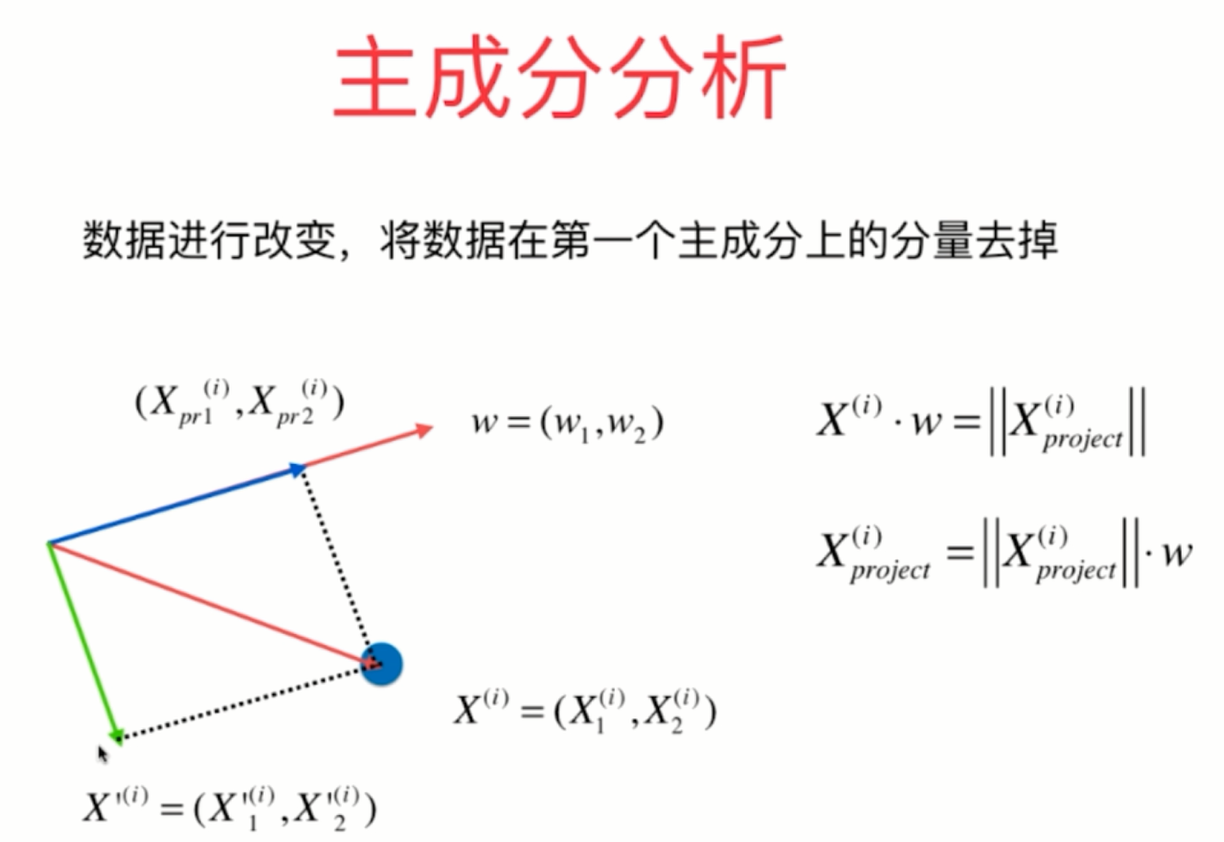

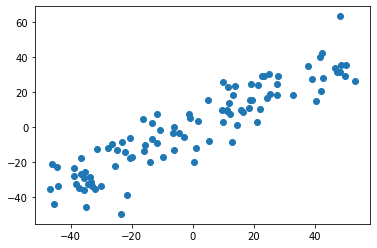

In [14]:
plt.scatter(x[:,0] , x[:,1])
plt.show()

#### 数据在第一主成分上的分量

In [15]:
b = x.dot(w).reshape(-1,1) * w
b

array([[  2.69354908,   2.21674942],
       [ 44.33861922,  36.49000084],
       [-18.14945505, -14.93672202],
       [-20.86808787, -17.17411496],
       [ 44.45752425,  36.58785784],
       [ 16.17854969,  13.31469725],
       [ -7.20608725,  -5.93049884],
       [  2.93264357,   2.4135205 ],
       [ 11.17914663,   9.20026552],
       [ 39.13840023,  32.21030069],
       [-10.08704771,  -8.30148493],
       [ 29.87078347,  24.58319481],
       [ -0.75916668,  -0.62478248],
       [  9.40448958,   7.7397501 ],
       [-14.35281625, -11.81214675],
       [ 35.0957776 ,  28.88328452],
       [-39.10872766, -32.18588062],
       [-35.62128145, -29.3157661 ],
       [-38.91005733, -32.022378  ],
       [ 27.83051049,  22.90408157],
       [ 46.37155398,  38.16307484],
       [-37.71414098, -31.03815726],
       [-15.29493846, -12.58749882],
       [-36.2021081 , -29.79377749],
       [-35.30585312, -29.05617343],
       [-42.92525265, -35.32682192],
       [-24.8132415 , -20.42091565],
 

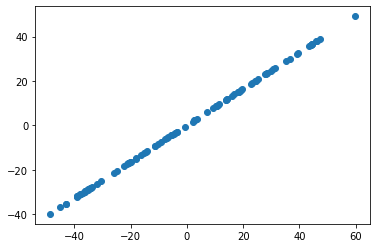

In [16]:
plt.scatter(b[:,0] , b[:,1])
plt.show()

In [17]:
w1 =  gradient_ascent(init_w , x , eta = 0.001)
w1

array([0.77213663, 0.63545655])

#### 原数据减去第一主成分上的分量

In [18]:
b = x - x.dot(w).reshape(-1,1) * w

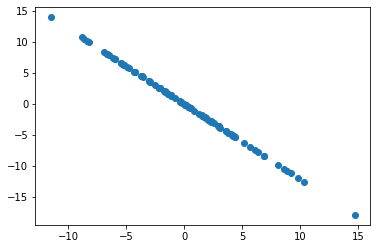

In [19]:
plt.scatter(b[:,0] , b[:,1])
plt.show()

### 求出第二主成分  


In [20]:
def sec_components(init_w , x ):
    
    w = gradient_ascent(init_w , x , eta = 0.001)
    x2 = x - x.dot(w).reshape(-1,1) * w
    return gradient_ascent(init_w , x2 , eta = 0.001)
    

In [21]:
w2 = sec_components(init_w , x)
w2

array([ 0.63545655, -0.77213663])

##### 第一主成分和第二主成分是垂直的关系

In [22]:
w2.dot(w1)

2.7755575615628914e-16

**求n个主成分**

In [23]:
def n_components(init_w , x , n , eta):
    x_pca = x.copy()
    res = []
    for i in range(n):
        
        w = gradient_ascent(init_w , x_pca , eta = 0.001)
        res.append(w)
        x_pca = x_pca - x_pca.dot(w).reshape(-1,1) * w
    
    return res

### PCA降维

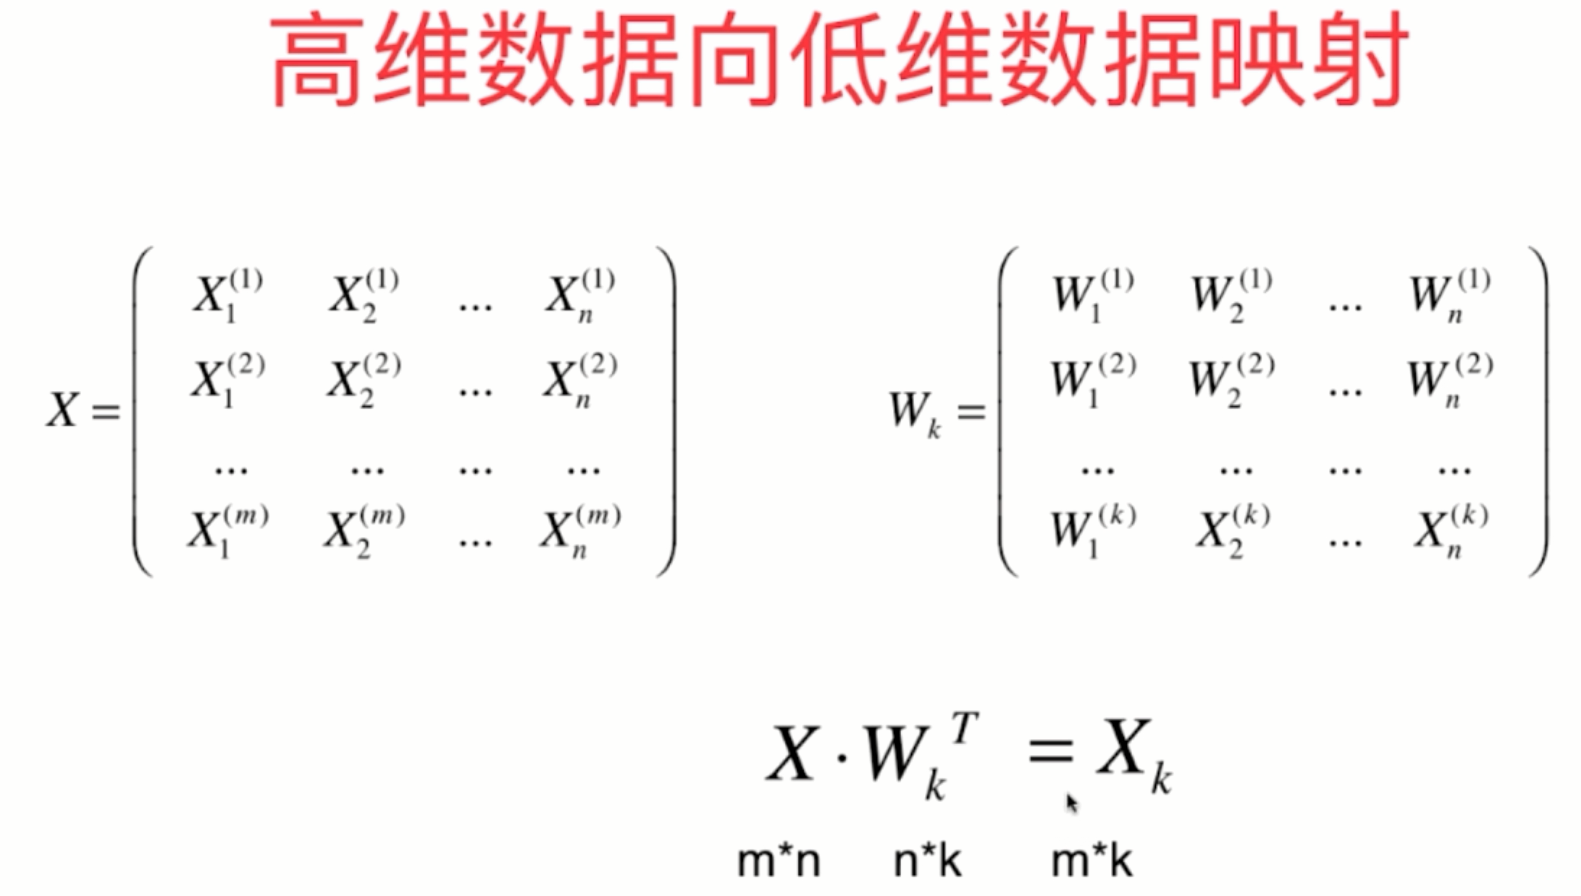

**低维到高维** 

降维的过程会丢失数据，升维并不能将失去的数据复原，仅仅是在高维表达低维的数据

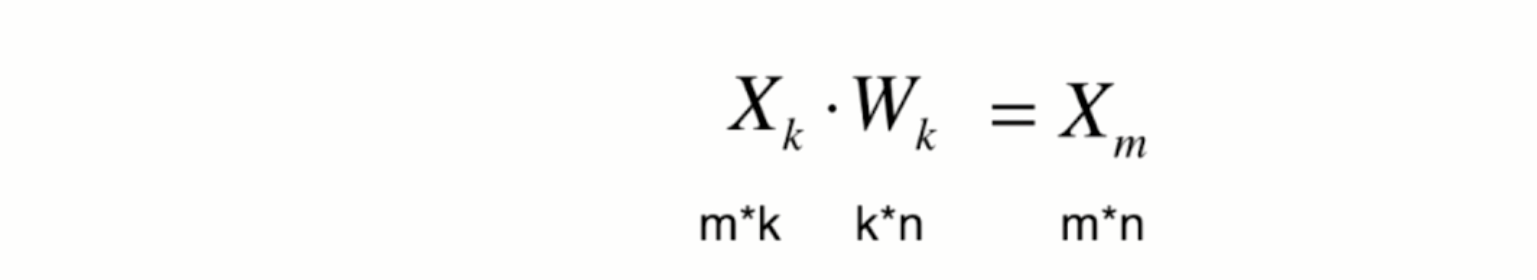

In [35]:
def High2Low(init_w , x , n):
    res = np.array(n_components(init_w , x , 1 ,eta = 0.001))
    
    return x.dot(res.T)

In [36]:
High2Low(init_w , x , 1)

array([[  3.48843584],
       [ 57.423282  ],
       [-23.50549687],
       [-27.02641885],
       [ 57.5772768 ],
       [ 20.95296239],
       [ -9.33265825],
       [  3.79808893],
       [ 14.47819757],
       [ 50.68843894],
       [-13.06381198],
       [ 38.6858782 ],
       [ -0.98320252],
       [ 12.17982577],
       [-18.58844117],
       [ 45.45280772],
       [-50.65000978],
       [-46.13339175],
       [-50.39271033],
       [ 36.0435052 ],
       [ 60.05615123],
       [-48.84387   ],
       [-19.80859079],
       [-46.88562475],
       [-45.72487812],
       [-55.59282024],
       [-32.13581724],
       [ 56.29565934],
       [ 24.74510987],
       [ 14.86208735],
       [ 18.2141239 ],
       [-49.51716416],
       [ 18.34777672],
       [ 59.446067  ],
       [ 31.52067923],
       [-46.92843762],
       [ 31.7835425 ],
       [-55.80536888],
       [-26.62097748],
       [ 21.94785809],
       [-44.16919854],
       [-41.38026257],
       [-45.09565324],
       [-18

### sklearn实现

In [1]:
from sklearn.decomposition import PCA

In [2]:
pca = PCA( n_components=1)
pca.fit(x)

NameError: name 'x' is not defined

In [40]:
pca.components_

array([[0.77213663, 0.63545655]])

In [43]:
x_reduction = pca.transform(x)  #降维
x_reduction

array([[  3.48843584],
       [ 57.423282  ],
       [-23.50549687],
       [-27.02641885],
       [ 57.5772768 ],
       [ 20.95296239],
       [ -9.33265825],
       [  3.79808893],
       [ 14.47819757],
       [ 50.68843894],
       [-13.06381198],
       [ 38.6858782 ],
       [ -0.98320252],
       [ 12.17982577],
       [-18.58844117],
       [ 45.45280772],
       [-50.65000978],
       [-46.13339175],
       [-50.39271033],
       [ 36.0435052 ],
       [ 60.05615123],
       [-48.84387   ],
       [-19.80859079],
       [-46.88562475],
       [-45.72487812],
       [-55.59282024],
       [-32.13581724],
       [ 56.29565934],
       [ 24.74510987],
       [ 14.86208735],
       [ 18.2141239 ],
       [-49.51716416],
       [ 18.34777672],
       [ 59.446067  ],
       [ 31.52067923],
       [-46.92843762],
       [ 31.7835425 ],
       [-55.80536888],
       [-26.62097748],
       [ 21.94785809],
       [-44.16919854],
       [-41.38026257],
       [-45.09565324],
       [-18

In [44]:
x_reduction.shape

(100, 1)

In [45]:
x_restore = pca.inverse_transform(x_reduction)  #升维
x_restore

array([[  2.69354908,   2.21674942],
       [ 44.33861922,  36.49000084],
       [-18.14945505, -14.93672202],
       [-20.86808787, -17.17411496],
       [ 44.45752425,  36.58785784],
       [ 16.17854969,  13.31469725],
       [ -7.20608725,  -5.93049884],
       [  2.93264357,   2.4135205 ],
       [ 11.17914663,   9.20026552],
       [ 39.13840023,  32.21030069],
       [-10.08704771,  -8.30148493],
       [ 29.87078347,  24.58319481],
       [ -0.75916668,  -0.62478248],
       [  9.40448958,   7.7397501 ],
       [-14.35281625, -11.81214675],
       [ 35.0957776 ,  28.88328452],
       [-39.10872766, -32.18588062],
       [-35.62128145, -29.3157661 ],
       [-38.91005733, -32.022378  ],
       [ 27.83051049,  22.90408157],
       [ 46.37155398,  38.16307484],
       [-37.71414098, -31.03815726],
       [-15.29493846, -12.58749882],
       [-36.2021081 , -29.79377749],
       [-35.30585312, -29.05617343],
       [-42.92525265, -35.32682192],
       [-24.8132415 , -20.42091565],
 

In [46]:
x_restore.shape

(100, 2)

### 应用真实数据

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

**数据集拆分**

In [5]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 666)

**使用KNN**

In [6]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train , y_train)

Wall time: 22.9 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
knn_clf.score(X_test , y_test)

0.9866666666666667

In [11]:
pca = PCA( n_components=2)

#对训练集和测试集都降到2维
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [12]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction , y_train)

Wall time: 998 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
knn_clf.score(X_test_reduction , y_test)

0.6066666666666667

可见时间大大缩短，但是准确率大幅下降

In [14]:
pca.explained_variance_ratio_  #每个维度的方差，加起来只有27%左右

array([0.14566817, 0.13735469])

不降维处理，拿到所有维度的方差值，选出影响较大的维度

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

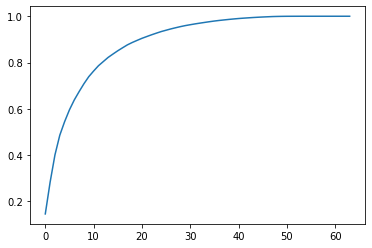

In [16]:
plt.plot([i for i in range(X_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

sklearn 中已经封装好函数，帮我们选择合适的维度

In [17]:
pca = PCA(0.95)   #0.95表示可以解释95%的数据
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [18]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction , y_train)

Wall time: 6.02 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
knn_clf.score(X_test_reduction , y_test)

0.98

可见时间缩短，准确率只下降了一点点

### 使用PCA对数据进行降维可视化

In [20]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)

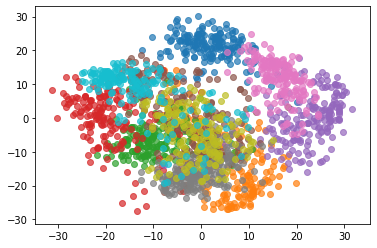

In [23]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.7)
plt.show()

应用：

假如我们只想区分蓝色和紫色所表示的数字，那么2维完全足够了

PCA还可以降噪

In [28]:
from sklearn.datasets import fetch_openml

In [29]:
mnist = fetch_openml("mnist_784")

C:\Users\hyh\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:55: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


KeyboardInterrupt: 

## 特征脸

In [30]:
from sklearn.datasets import fetch_lfw_people

In [31]:
faces = fetch_lfw_people()

ConnectionResetError: [WinError 10054] 远程主机强迫关闭了一个现有的连接。